# PA006 - Bank Marketing  Strategy

# Solution Planning ( IOT )

## Imput

 I have been as a Data Scientis Consultant to build a data product that create a customers segmentattion which will handle the marketing strategy and the following expected results from consultancy:
        
        
- 1. Create customer segmentation based on clear selection criteria.
- 2. Make customer segmentation accessible to the operations team.
- 3. Teach the operations team how to use the solution.
- 4. Transfer knowledge to international bank Data Scientists.
- 5. Recommend 3 business levers for each customer segment. 


## Output

- Tools:
    - Jupyter Notebook
    - Metabase
    - Streamlit
    
    
- URL to the Operation team make tests;
- Download of selected data;


# Tasks

- Data Descriptive:
    - NA's replace
    - Outliers Detection
    
    
- EDA:
    - Univariate Analysis
    - Bivariate Analysis
    - Outliers Detection
    - Feature Selection
    - Study of Space
    - Embeding Definition
    
- Machine Learning Training:
    - Performance Analysis
    - Clustering Analysis
    - Define clustering number
    
- EDA - Insights:
    - Expain the segmentattion characters
    
- Table to store the clustered clients
- Creat the production script


- AWS Architecture:
    - S3 for store the data
    - EC2 for store the ETL and visualization tool.
    - DB to store the table 
    - Cronjob
    - Papermill

# 0.1 Imports

In [3]:
import inflection

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn import cluster as c
from sklearn import metrics as m

from IPython.core.display        import HTML
from bayes_opt                   import BayesianOptimization
from bayes_opt                   import UtilityFunction
from matplotlib                  import gridspec


# 0.2 Helper functions

In [4]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

jupyter_settings()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Discriptive

## 1.1 Load dataset

In [37]:
df1 = pd.read_csv( '/Users/adriele/Documents/repos/pa006/dataset/bank.csv')

## 1.2 Rename columns

In [38]:
df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [39]:
df1.columns = [ 'id', 'balance', 'balance_freq', 'purchases','one_purchases', 'install_purchases', 'cash_adv',
       'purchases_freq', 'one_purchases_freq', 'purchases_install_freq', 'cash_adv_freq',
       'cash_adv_TRX', 'purchases_trx', 'credit_limit', 'payments','min_pay', 'prc_full_pay', 'tenure']



In [40]:
df1.head(20)

,id,balance,balance_freq,purchases,one_purchases,install_purchases,cash_adv,purchases_freq,one_purchases_freq,purchases_install_freq,cash_adv_freq,cash_adv_TRX,purchases_trx,credit_limit,payments,min_pay,prc_full_pay,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## 1.3 Data Dimension

In [41]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 18
Number of Rows 8950


## 1.4 Check NA

In [42]:
df1.isna().sum()

id                          0
balance                     0
balance_freq                0
purchases                   0
one_purchases               0
install_purchases           0
cash_adv                    0
purchases_freq              0
one_purchases_freq          0
purchases_install_freq      0
cash_adv_freq               0
cash_adv_TRX                0
purchases_trx               0
credit_limit                1
payments                    0
min_pay                   313
prc_full_pay                0
tenure                      0
dtype: int64

## 1.5 Replace NA

In [43]:
df1 = df1.dropna()

In [44]:
df1.isna().sum()

id                        0
balance                   0
balance_freq              0
purchases                 0
one_purchases             0
install_purchases         0
cash_adv                  0
purchases_freq            0
one_purchases_freq        0
purchases_install_freq    0
cash_adv_freq             0
cash_adv_TRX              0
purchases_trx             0
credit_limit              0
payments                  0
min_pay                   0
prc_full_pay              0
tenure                    0
dtype: int64

## 1.6 Data Types

In [45]:
df1.dtypes

id                         object
balance                   float64
balance_freq              float64
purchases                 float64
one_purchases             float64
install_purchases         float64
cash_adv                  float64
purchases_freq            float64
one_purchases_freq        float64
purchases_install_freq    float64
cash_adv_freq             float64
cash_adv_TRX                int64
purchases_trx               int64
credit_limit              float64
payments                  float64
min_pay                   float64
prc_full_pay              float64
tenure                      int64
dtype: object

# 2.0 Data Filtering

In [46]:
df2 = df1.copy()

In [47]:
df2.head()

,id,balance,balance_freq,purchases,one_purchases,install_purchases,cash_adv,purchases_freq,one_purchases_freq,purchases_install_freq,cash_adv_freq,cash_adv_TRX,purchases_trx,credit_limit,payments,min_pay,prc_full_pay,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


# 3.0 Feature Engeneering

In [48]:
df3 = df2.copy()

# 4.0 Exploratory Data Analysis

In [49]:
df4 = df3.copy()

# 5.0 Data Preparation

In [50]:
df5 = df4.copy()

# 6.0 Feature Selection

In [51]:
df6 = df5.copy()

In [52]:
df6.head()

,id,balance,balance_freq,purchases,one_purchases,install_purchases,cash_adv,purchases_freq,one_purchases_freq,purchases_install_freq,cash_adv_freq,cash_adv_TRX,purchases_trx,credit_limit,payments,min_pay,prc_full_pay,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


# 7.0 Fine Tunning Hyperparameter

In [65]:
df7 = df6.copy()


x = df7.drop( columns=['id'] )


## 7.1 KMeans

In [66]:
clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
davies_list = []

for k in clusters:
    # modeldefinition
    kmeans_model = c.KMeans( n_init=10, n_clusters=k )
    
    # model training
    kmeans_model.fit( x )
    
    # Model predict 
    labels =  kmeans_model.predict( x )
    
    # model performance
    sil = m.silhouette_score( x, labels )
    dav = m.davies_bouldin_score( x, labels )
    
    
    silhouette_list.append( sil)
    davies_list.append( dav )


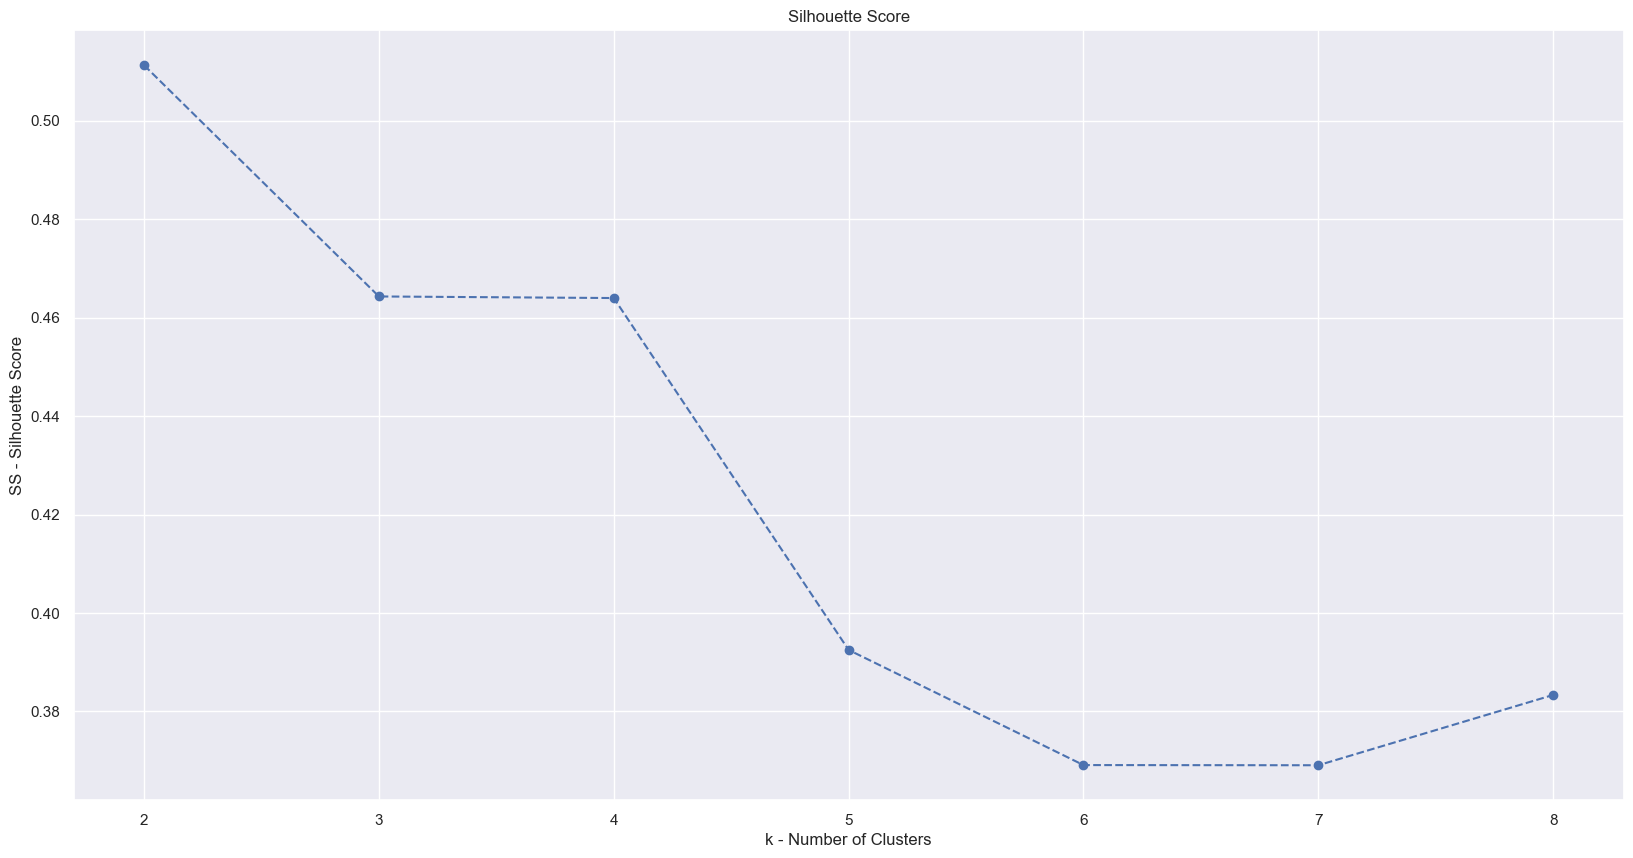

In [67]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'SS - Silhouette Score' )
plt.title('Silhouette Score');

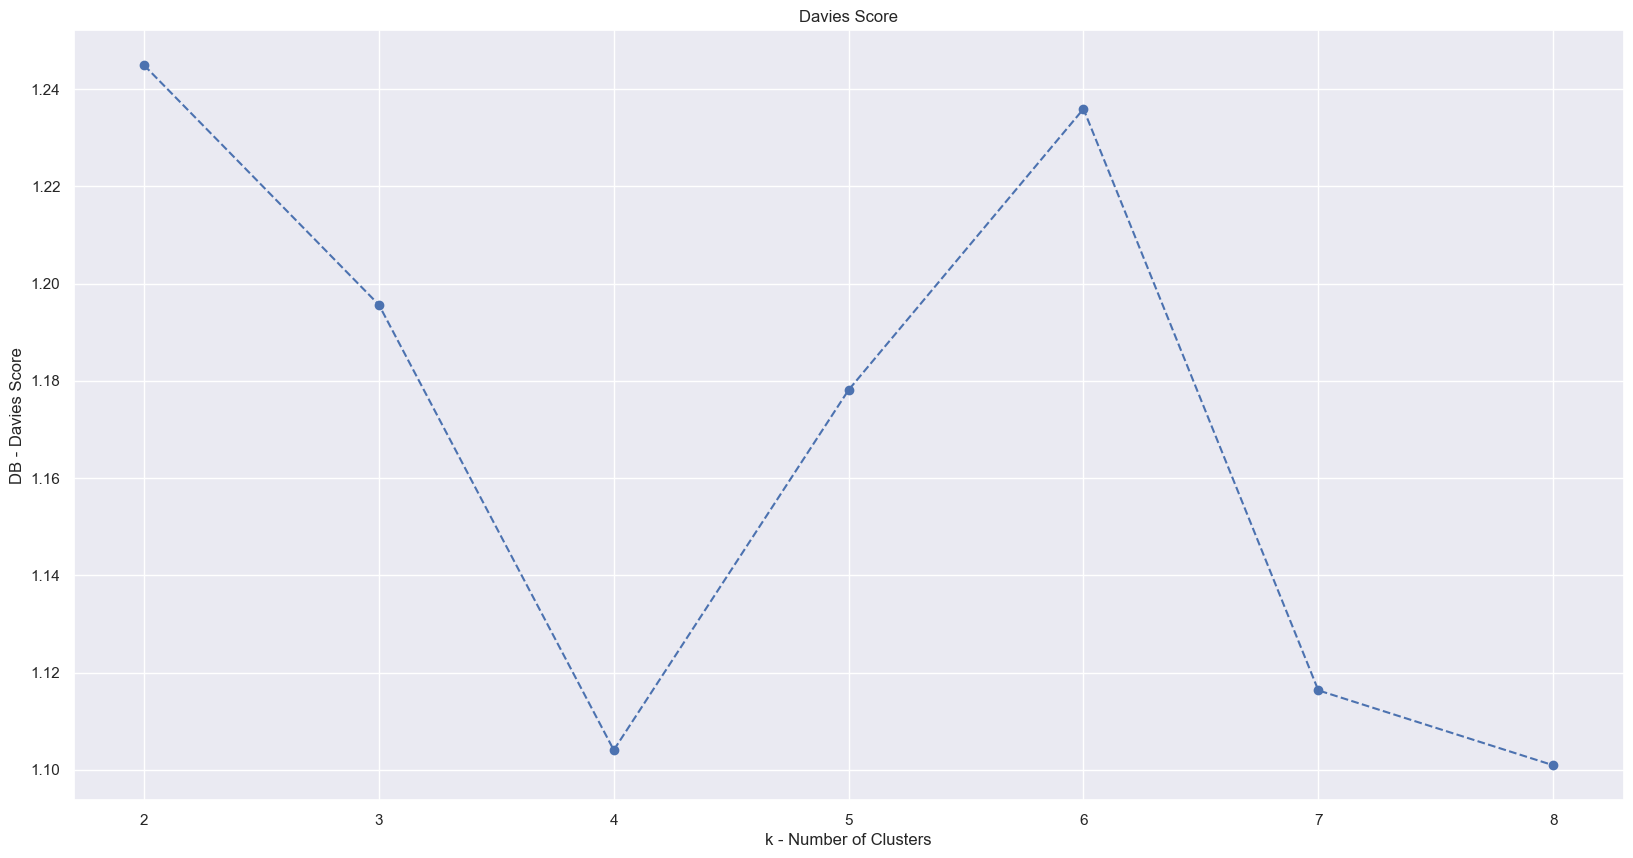

In [68]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'DB - Davies Score' )
plt.title('Davies Score');

# 8.0 Machine Learning

# 9.0 Clustering Analysis

# 10.0 EDA - Insight Reports

# 11.0 Deploy to Production